In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
print(df.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
labels = le.transform(df['class'])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df['class'] = labels
print(df.head())

   sepal-length  sepal-width  petal-length  petal-width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [7]:
df = np.array(df)
Y = np.array(df[:, -1])
print(df[:10, :])
print(Y.shape)
print(Y)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]]
(150,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [8]:
output_size = 3
input_size = 4
hidden_layer_size = 30
N = len(Y)

targets_data = np.zeros((N, output_size))

for i in range(N):
    targets_data[i, int(Y[i])] = 1

input_data = df[:, :-1]


In [16]:
# Reset the default graph, so you can fiddle with the hyperparameters and then rerun the code.
tf.reset_default_graph()

# Create the placeholders
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.int32, [None, output_size])

# Outline the model. We will create a net with 2 hidden layers
weights_1 = tf.get_variable("weights_1", [input_size, hidden_layer_size])
biases_1 = tf.get_variable("biases_1", [hidden_layer_size])
outputs_1 = tf.nn.tanh(tf.matmul(inputs, weights_1) + biases_1)

weights_2 = tf.get_variable("weights_2", [hidden_layer_size, hidden_layer_size])
biases_2 = tf.get_variable("biases_2", [hidden_layer_size])
outputs_2 = tf.nn.tanh(tf.matmul(outputs_1, weights_2) + biases_2)

weights_3 = tf.get_variable("weights_3", [hidden_layer_size, hidden_layer_size])
biases_3 = tf.get_variable("biases_3", [hidden_layer_size])
outputs_3 = tf.nn.tanh(tf.matmul(outputs_2, weights_3) + biases_3)

weights_4 = tf.get_variable("weights_4", [hidden_layer_size, hidden_layer_size])
biases_4 = tf.get_variable("biases_4", [hidden_layer_size])
outputs_4 = tf.nn.tanh(tf.matmul(outputs_3, weights_4) + biases_4)

weights_5 = tf.get_variable("weights_5", [hidden_layer_size, output_size])
biases_5 = tf.get_variable("biases_5", [output_size])
outputs = tf.matmul(outputs_4, weights_5) + biases_5

# Use the softmax cross entropy loss with logits
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=outputs, labels=targets)
mean_loss = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

predict = tf.argmax(outputs, 1)

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()

In [17]:
# print(input_data)
# print(targets_data)
costs = []
sess.run(init)
for i in range(200):
    _, loss = sess.run([optimizer, mean_loss], feed_dict={inputs: input_data, targets: targets_data})
    costs.append(loss)
    pred = sess.run(predict, feed_dict={inputs: input_data, targets: targets_data})
    if i % 50 == 0:
        print(np.mean(Y == pred))

sess.close()

0.44666666666666666
0.9733333333333334
0.98


0.9866666666666667


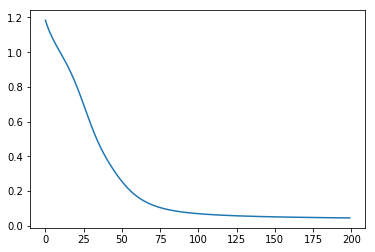

In [18]:
plt.plot(costs)
plt.show()